In [4]:
import numpy as np
import pandas as pd


def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']

random=get_accuracy_bandit_model(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\MAB\Random.csv', best_conditions)
random


0      0.028
1      0.026
2      0.018
3      0.022
4      0.026
       ...  
145    0.036
146    0.030
147    0.022
148    0.024
149    0.030
Length: 150, dtype: float64

In [1]:
import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()  
    time_horizon = df['horizon'].max()  
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1): 
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)): 
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']

BayesUCBGaussian=get_accuracy_bandit_model(r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results\MAB\BayesUCBGaussian.csv', best_conditions)
BayesUCBGaussian

0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.414
146    0.408
147    0.406
148    0.396
149    0.382
Length: 150, dtype: float64

In [5]:

import numpy as np
import pandas as pd
def get_accuracy_bandit_model(fp, best_conditions):
    df = pd.read_csv(fp)
    df = df[['sim', 'horizon', 'condition']]
    n_simulations = df['sim'].max()
    time_horizon = df['horizon'].max()
    best_arms = np.empty((n_simulations, time_horizon), dtype=object)
    for sim in range(1, n_simulations + 1):
        data = df[df['sim'] == sim]['condition'].values
        # print(data)
        for t in range(len(data)):
            u, counts = np.unique(data[:t+1], return_counts=True)
            most_selected_condition = u[np.random.choice(np.flatnonzero(counts == max(counts)))]
            best_arms[sim - 1, t] = most_selected_condition
    isinfunc = lambda x: x in best_conditions
    visinfunc = np.vectorize(isinfunc)
    boo = visinfunc(best_arms)
    boo=pd.DataFrame(boo)
    probs = boo.sum(axis=0)/n_simulations
    return probs
best_conditions = ['2,6-Lutidine+THF+TCFH', 'N-methylmorpholine+MeCN+TCFH', 'N-methylmorpholine+DMF+DPPCl']

encondings=['One-hot','mordred','CM','EI','Morgan']
models=['svm','Gaussian_process','decision_tree','random_forest','Knn']
cns=[]
path=r'C:\Users\Administrator\Desktop\supply data\Basic experiment\Amide Coupling\results'
for model in models:
    for enconding in encondings:
        cn=get_accuracy_bandit_model(path+f'\{model}_history_500_{enconding}.csv', best_conditions)
        print(f'{model}_{enconding}',cn)
        cns.append(cn)


svm_One-hot 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.440
146    0.436
147    0.448
148    0.458
149    0.456
Length: 150, dtype: float64
svm_mordred 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.636
146    0.674
147    0.674
148    0.682
149    0.664
Length: 150, dtype: float64
svm_CM 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.294
146    0.296
147    0.308
148    0.288
149    0.324
Length: 150, dtype: float64
svm_EI 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.158
146    0.160
147    0.158
148    0.154
149    0.172
Length: 150, dtype: float64
svm_Morgan 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
       ...  
145    0.354
146    0.356
147    0.362
148    0.366
149    0.344
Length: 150, dtype: float64
Gaussian_process_One-hot 0      0.000
1      0.000
2      0.000
3      0.000
4      0.000
      

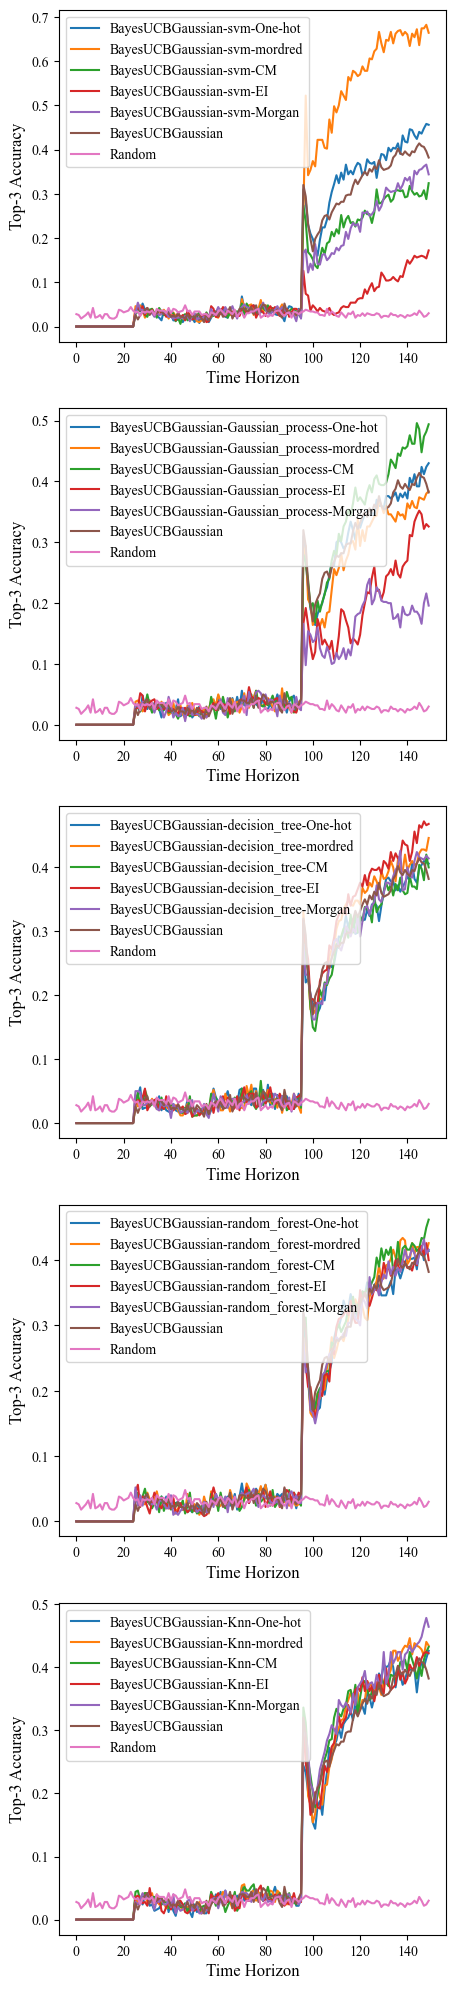

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 25))
# sns.set(style='whitegrid')
for i in range(len(models)):
    plt.subplot(len(models), 1, i+1)
    for j in range(len(encondings)):
        plt.plot(cns[i*len(encondings)+j], label=f'BayesUCBGaussian-{models[i]}-{encondings[j]}')
    plt.plot(BayesUCBGaussian, label='BayesUCBGaussian')
    plt.plot(random, label='Random')
    plt.legend()
    plt.xlabel('Time Horizon', fontsize=12)
    plt.ylabel('Top-3 Accuracy', fontsize=12)    
    